# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=d20b697ff955f02ae68740b7571b1a87ac68b82902408224c7d69ade56dde8bb
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = [] # menyimpan koordinat lat dan long

# Empty list for holding the cities names
cities = [] # menyimpan kota yg ditemukan berdasarkan koordinat yg dihasilkan

# Range of latitudes and longitudes
lat_range = (-90, 90) # batas lat di bumi berkisar dari -90 (kutub selatan) hingga 90 (kutub utara)
lng_range = (-180, 180) # batas long di bumi berkisar dari -180 hingga 180 (mencakup seluruh bola dunia dari barat ke timur)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #menghasilkan 1500 nilai latitude acak dalam rentang -90 hingga 90
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #menghasilkan 1500 nilai longitude acak dalam rentang -180 hingga 180.
lat_lngs = zip(lats, lngs) #menggabungkan daftar latitude dan longitude menjadi pasangan koordinat (latitude, longitude)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs: #perulangan akan memproses setiap kombinasi latitude dan longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #menemukan nama kota terdekat berdasarkan koordinat lat dan long. nama kota kemudian disimpan dalam city

    # If the city is unique, then add it to a our cities list
    if city not in cities: #jika nama kota belum ada di dalam list cities, maka kota akan ditambahkan ke list
        cities.append(city) #menambahkan kota baru yang belum ada ke dalam cities agar tidak ada duplikasi kota

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


Kode ini bertujuan untuk menghasilkan 1500 kombinasi acak dari latitude dan longitude, kemudian untuk setiap kombinasi koordinat tersebut, kode akan mencari kota terdekat menggunakan pustaka citipy. Hanya kota yang unik (tidak duplikat) yang akan ditambahkan ke dalam list cities, dan pada akhirnya, jumlah kota yang berhasil dikumpulkan akan ditampilkan.

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather' #url API

# Define an empty list to fetch the weather data for each city
city_data = [] #list kosong untuk menyimpan data cuaca untuk setiap kota yang berhasil diambil

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 #penghitung untuk mencatat jumlah record yang telah diproses
set_count = 1 #penghitung untuk mencatat set data


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities): #iterasi melalui list cities untuk mengambil data cuaca untuk setiap kota, i sebagai indeks dan city sebagai nama kota

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50): #jika jumlah kota yang telah diproses adalah kelipatan 50, increment set_count dan reset record_count ke 0
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=d1f73d1e7d5bcc3ca49434ae9354ef59"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city)) #mencetak informasi tentang kota yang sedang diproses, termasuk nomor record dan set

    # Add 1 to the record count
    record_count += 1 #menambahkan 1 ke record_count untuk mencatat bahwa satu record telah diproses

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #mengirim permintaan GET ke URL endpoint yang telah dibuat dan mengonversi respons JSON menjadi objek Python

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except: #jika terjadi kesalahan kota tidak ditemukan maka akan mencetak pesan dan melanjutkan ke iterasi berikutnya
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1) #menambahkan jeda satu detik antara permintaan API untuk menghindari pembatasan dari server API (rate limiting)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | big bend
Processing Record 6 of Set 1 | alton north (historical)
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | dryden
Processing Record 10 of Set 1 | crane
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | tacna
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | dapa
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | nahiyat al fuhud
Processing R

Kode ini bertujuan untuk mengambil data cuaca untuk setiap kota dalam daftar cities menggunakan API OpenWeatherMap. Data yang diambil mencakup informasi seperti latitude, longitude, suhu maksimum, kelembapan, dan lain-lain, dan hasilnya disimpan dalam list city_data. Kode ini juga menangani kesalahan yang mungkin terjadi dan mencetak informasi status selama proses berlangsung.

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

,0
City,592
Lat,592
Lng,592
Max Temp,592
Humidity,592
Cloudiness,592
Wind Speed,592
Country,592
Date,592


In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,298.59,94,0,6.17,US,1728377446
1,bethel,41.3712,-73.4140,282.56,85,0,0.00,US,1728377447
2,bilibino,68.0546,166.4372,265.53,95,100,2.17,RU,1728377449
3,big bend,-26.8167,31.9333,299.20,53,96,2.06,SZ,1728377450
4,alton north (historical),26.2953,-98.3045,295.04,81,0,0.00,US,1728377451


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("/content/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("/content/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,298.59,94,0,6.17,US,1728377446
1,bethel,41.3712,-73.4140,282.56,85,0,0.00,US,1728377447
2,bilibino,68.0546,166.4372,265.53,95,100,2.17,RU,1728377449
3,big bend,-26.8167,31.9333,299.20,53,96,2.06,SZ,1728377450
4,alton north (historical),26.2953,-98.3045,295.04,81,0,0.00,US,1728377451


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

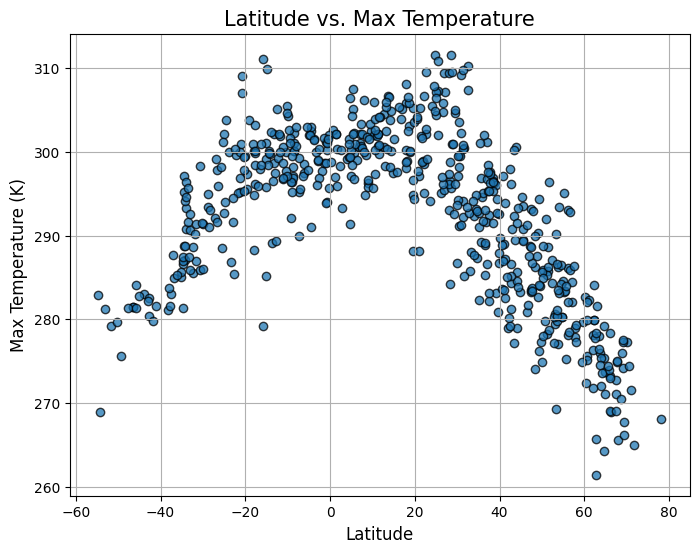

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6)) #ukuran gambar
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)
#membuat scatter plot dengan menggunakan data latitude pada sumbu-x dan suhu maksimum (Max Temp) pada sumbu-y
#alpha=0.75: menentukan transparansi titik-titik plot (nilai 1.0 tidak transparan, dan nilai 0.0 transparan)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature", fontsize=15) #judul grafik
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (K)", fontsize=12)
plt.grid(True) #menambahkan grid

# Save the figure
plt.savefig("/content/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

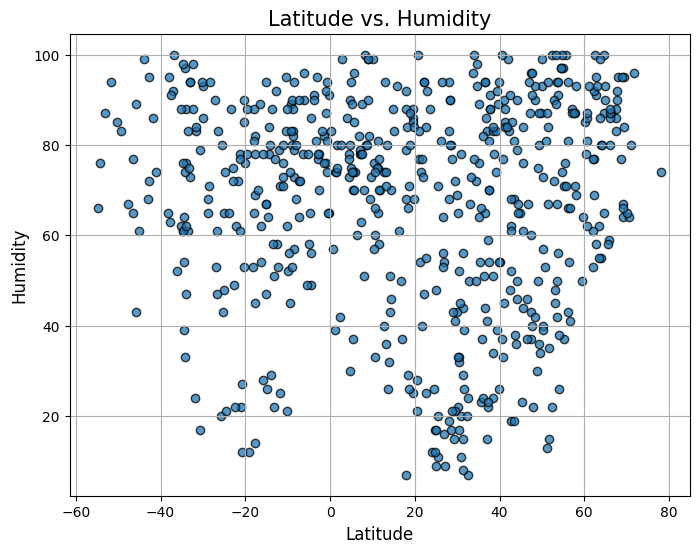

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("/content/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

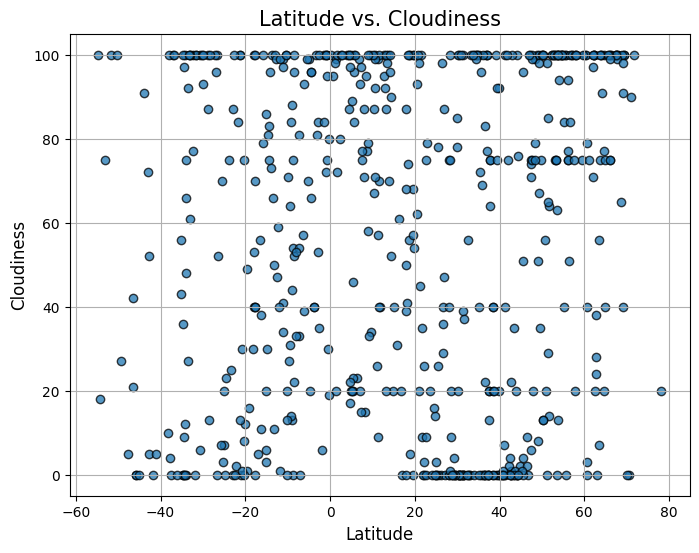

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("/content/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

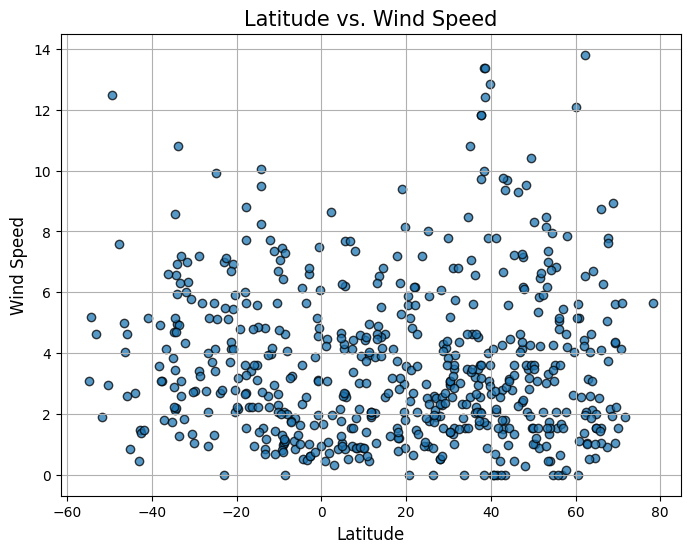

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("/content/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# Definisikan fungsi untuk membuat plot scatter dengan garis regresi
def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere):
    # Ubah data menjadi array numpy
    x = np.array(x_values).reshape(-1, 1)  #mengonversi data x_values menjadi array 2D menggunakan reshape(-1, 1)
    y = np.array(y_values) #mengonversi y_values menjadi array numpy

    # Membuat model regresi linear
    model = LinearRegression() #membuat objek model regresi linear menggunakan LinearRegression dari Scikit-learn
    model.fit(x, y) #melatih model regresi menggunakan data x dan y

    # Prediksi nilai y berdasarkan model
    y_pred = model.predict(x) #menggunakan model regresi yang telah dilatih untuk memprediksi nilai y (hasil) berdasarkan data x (input)

    # Menghitung nilai R-squared
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    #Slope: Kemiringan garis regresi.
    #Intercept: Titik potong garis dengan sumbu-y.
    #R-value: Koefisien korelasi.
    #R-squared (r_value²): Menunjukkan seberapa baik data cocok dengan model regresi (dinyatakan di plot).
    #P-value dan Standard error (std_err): Statistik tambahan yang relevan untuk mengukur signifikan regresi.

    # Membuat plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, color='blue', label='Data Points')  # scatter plot untuk menampilkan data aslinya (titik-titik biru)
    plt.plot(x_values, y_pred, color='red', label=f'Regression Line (R² = {r_value**2:.2f})')  # Garis regresi

    # Tambahkan teks persamaan regresi di plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}' #menyusun persamaan garis regresi (dalam bentuk y = mx + c)
    plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')
    #menempatkan persamaan regresi di bagian atas plot sebagai anotasi dengan posisi relatif pada koordinat sumbu, dengan teks berwarna merah

    # Pengaturan properti grafik
    plt.title(f'{title} ({hemisphere})', fontsize=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(True)

    # Tampilkan plot
    plt.show()

membuat scatter plot dari data yang diberikan dan menambahkan garis regresi linear untuk menunjukkan hubungan linear antara dua variabel. Fungsi juga menghitung dan menampilkan persamaan garis regresi serta nilai R-squared pada grafik

x_values: Data yang digunakan untuk sumbu-x.
y_values: Data yang digunakan untuk sumbu-y.
x_label: Label untuk sumbu-x.
y_label: Label untuk sumbu-y.
title: Judul dari grafik.
hemisphere: Bagian tambahan untuk judul grafik, mengacu pada wilayah (misalnya "Northern Hemisphere")

*r_value**2* : Nilai yang dikuadratkan ini disebut R-squared (R²), yang digunakan untuk menunjukkan seberapa baik data cocok dengan model regresi linear. Nilai R² berkisar antara 0 hingga 1, dengan 1 menunjukkan bahwa model sangat baik dalam menjelaskan variabilitas data.

.2f : membatasi jumlah desimal yang ditampilkan.

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,298.59,94,0,6.17,US,1728377446
1,bethel,41.3712,-73.4140,282.56,85,0,0.00,US,1728377447
2,bilibino,68.0546,166.4372,265.53,95,100,2.17,RU,1728377449
4,alton north (historical),26.2953,-98.3045,295.04,81,0,0.00,US,1728377451
7,dryden,49.7833,-92.7503,277.31,87,75,1.54,CA,1728377454


1. **`city_data_df['Lat'] >= 0`**:
   - Ini adalah sebuah kondisi atau *filter* yang digunakan untuk memilih baris-baris dalam DataFrame `city_data_df` di mana kolom **`Lat`** (latitude) bernilai sama dengan atau lebih besar dari **0**. Latitude menunjukkan posisi di utara atau selatan khatulistiwa, dengan nilai positif untuk belahan bumi utara (0 hingga 90) dan negatif untuk belahan bumi selatan.
   - Jadi, baris-baris yang memenuhi kondisi ini adalah data dari kota-kota di belahan bumi utara (Northern Hemisphere).

2. **`northern_df = city_data_df[...]`**:
   - `city_data_df[...]` digunakan untuk menyaring DataFrame asal (`city_data_df`) dan hanya menyimpan baris yang memenuhi kondisi `Lat >= 0`. Data yang dihasilkan disimpan dalam DataFrame baru bernama **`northern_df`**.

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,big bend,-26.8167,31.9333,299.20,53,96,2.06,SZ,1728377450
5,adamstown,-25.0660,-130.1015,292.76,65,7,3.41,PN,1728377452
6,waitangi,-43.9535,-176.5597,283.05,99,91,2.68,NZ,1728377453
10,tacna,-18.0056,-70.2483,288.26,88,100,3.60,PE,1728377458
11,margaret river,-33.9500,115.0667,290.78,76,0,4.96,AU,1728377459



1. **`city_data_df['Lat'] < 0`**:
   - memilih baris-baris dalam DataFrame **`city_data_df`** di mana kolom **`Lat`** (latitude) bernilai **kurang dari 0**. Latitude menunjukkan posisi di utara atau selatan khatulistiwa. Nilai negatif pada latitude menunjukkan lokasi di **belahan bumi selatan** (0 hingga -90).
   - Dengan kondisi ini, baris-baris yang memenuhi syarat adalah data dari kota-kota yang terletak di belahan bumi selatan.

2. **`southern_df = city_data_df[...]`**:
   - `city_data_df[...]` digunakan untuk menyaring DataFrame asal `city_data_df` sehingga hanya menyimpan baris-baris yang memenuhi kondisi **`Lat < 0`**. Hasilnya disimpan dalam DataFrame baru bernama **`southern_df`**.



###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
!pip install matplotlib numpy scikit-learn scipy


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn.linear_model
from scipy import stats

1. **`northern_df['Lat']`**:
   - Ini mengambil data dari kolom **`Lat`** (latitude) dalam **DataFrame `northern_df`**, yang hanya berisi data dari kota-kota di **belahan bumi utara**.
   - Latitude adalah sumbu X (independen) pada plot.

2. **`northern_df['Max Temp']`**:
   - Ini mengambil data dari kolom **`Max Temp`** dalam **DataFrame `northern_df`**, yang berisi suhu maksimum (dalam Kelvin) untuk setiap kota di belahan bumi utara.
   - Suhu maksimum adalah sumbu Y (dependen) pada plot.

3. - **`"Latitude"`**: Label untuk sumbu X, yaitu Latitude.
   - **`"Max Temperature (K)"`**: Label untuk sumbu Y, yaitu suhu maksimum dalam satuan Kelvin.
   - **`"Temperature vs Latitude"`**: Judul dari plot yang menggambarkan hubungan antara Latitude dan Max Temperature.
   - **`"Northern Hemisphere"`**: Indikator bahwa plot ini khusus untuk belahan bumi utara.
   
- **Scatter Plot**: Menampilkan data **latitude** dan **suhu maksimum** untuk kota-kota di belahan bumi utara sebagai titik-titik pada grafik.
- **Regresi Linear**: Menghitung garis regresi linear berdasarkan data tersebut dan menampilkan garis ini di plot. Ini menunjukkan tren hubungan antara latitude (garis lintang) dan suhu maksimum.
- **R²**: Fungsi `plot_linear_regression` menambahkan informasi koefisien determinasi (R²) untuk mengukur seberapa baik model regresi linear menjelaskan data.

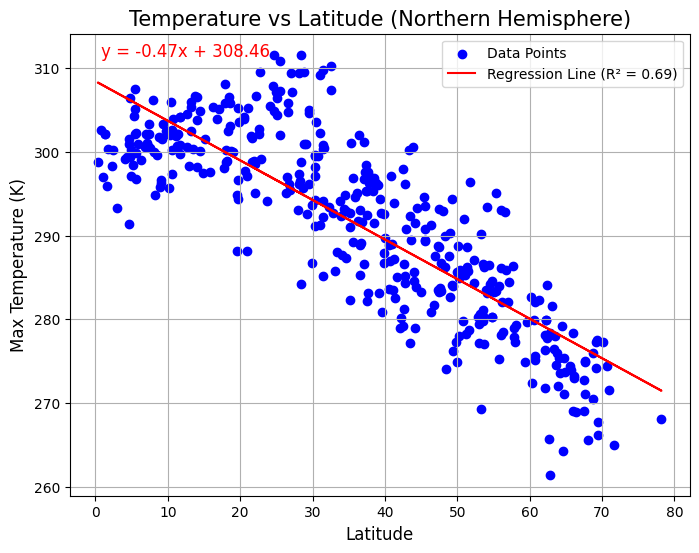

In [ ]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'],
                       "Latitude", "Max Temperature (K)", "Temperature vs Latitude", "Northern Hemisphere")


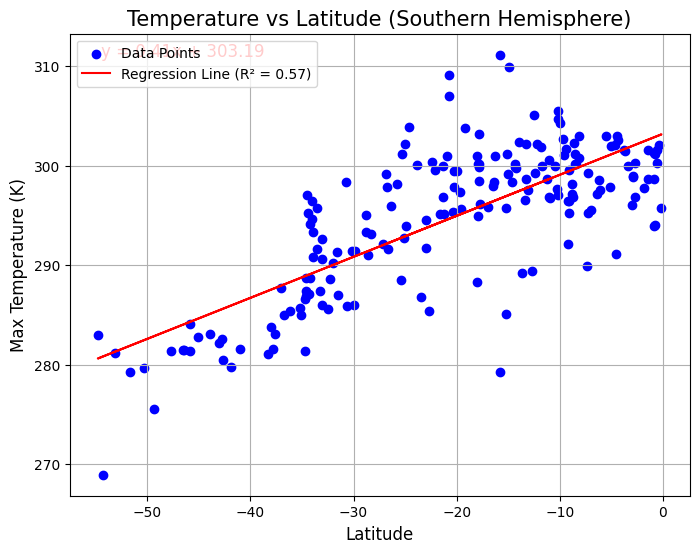

In [ ]:
# Linear regression on Southern Hemisphere
# Contoh scatter plot dengan regresi linear untuk belahan bumi selatan
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'],
                       "Latitude", "Max Temperature (K)", "Temperature vs Latitude", "Southern Hemisphere")

**Temperature vs. Latitude:**
Belahan Bumi Utara:
hubungan suhu dengan latitude: menunjukkan hubungan antara suhu maksimum (y) dan latitude(x) untuk belahan bumi utara (0-80)
regresi linear: garis regresi menunjukkan kemiringan negatif yang kuat dengan persamaan regresi y = -0.47x + 308.46 dan nilai R^2 sebesar 0.69 yang menunjukkan bahwa 69% dari variabilitas suhu dapat dijelaskan oleh latitude. suhu cenderung menurun dengan peningkatan latitude.
distribusi data: suhu lebih tinggi di latitude rendah dan menurun secara signifikan di latitude yang lebih tinggi


Belahan Bumi Selatan:
hubungan suhu dengan latitude: menunjukkan hubungan antara suhu maksimum (y) dan latitude(x) untuk belahan bumi selaran (-50 - 0)
regresi linear: garis regresi menunjukkan kemiringan positif yang kuat dengan persamaan regresi y = -0.41x + 303.19 dan nilai R^2 sebesar 0.57 yang menunjukkan bahwa 57% dari variabilitas suhu dapat dijelaskan oleh latitude. suhu cenderung menaik dengan peningkatan latitude.
distribusi data: suhu lebih tinggi di latitude tinggi dan menurun secara signifikan di latitude yang lebih rendah



### Humidity vs. Latitude Linear Regression Plot

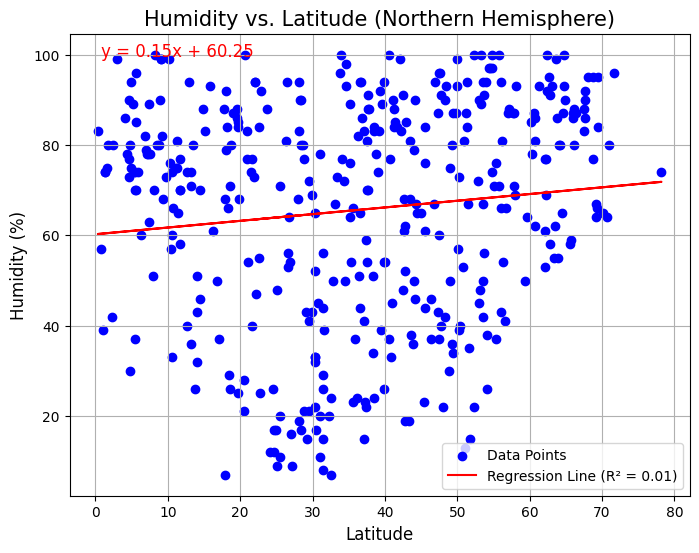

In [ ]:
# Northern Hemisphere
# Plot untuk Humidity vs Latitude
plot_linear_regression(northern_df["Lat"], northern_df["Humidity"], "Latitude", "Humidity (%)",
                       "Humidity vs. Latitude", "Northern Hemisphere")


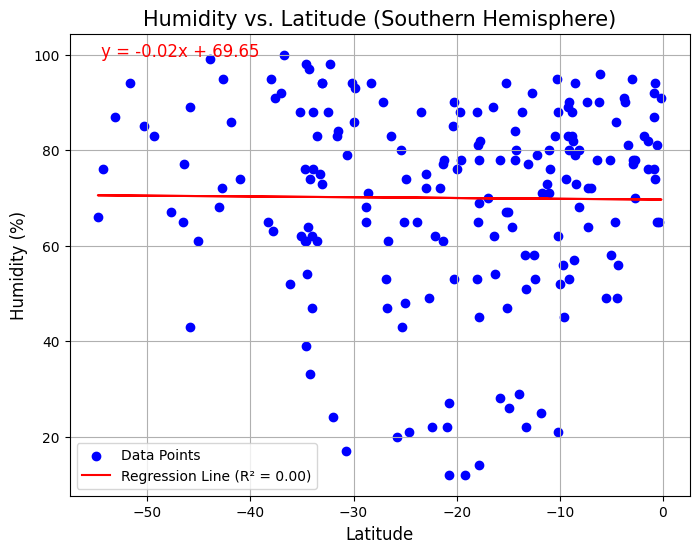

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_df["Lat"], southern_df["Humidity"], "Latitude", "Humidity (%)",
                       "Humidity vs. Latitude", "Southern Hemisphere")



**Discussion about the linear relationship:**

**Humidity vs. Latitude:**
Belahan Bumi Utara:
Hubungan antara kelembapan dan latitude di belahan bumi utara menunjukkan tren positif yang sangat lemah dengan persamaan regresi  dan koefisien determinasi . Ini berarti setiap kenaikan 1 derajat latitude di belahan bumi utara berhubungan dengan peningkatan kelembapan sekitar 0,15%. Namun, nilai  yang sangat rendah menunjukkan bahwa hubungan antara latitude dan kelembapan tidak signifikan, dan latitude hanya menjelaskan sekitar 1% variasi dalam data kelembapan. Data ini sangat tersebar, menunjukkan bahwa faktor lain kemungkinan besar lebih berpengaruh dalam menentukan kelembapan selain latitude.



Belahan Bumi Selatan:
Hubungan antara kelembapan dan latitude di belahan bumi selatan menunjukkan tren yang sangat lemah dengan persamaan regresi y = -0.02x + 69.65 dan koefisien determinasi 0.00. Namun, nilai  yang sangat rendah menunjukkan bahwa hubungan antara latitude dan kelembapan tidak signifikan. Data ini sangat tersebar, menunjukkan bahwa faktor lain kemungkinan besar lebih berpengaruh dalam menentukan kelembapan selain latitude.

### Cloudiness vs. Latitude Linear Regression Plot

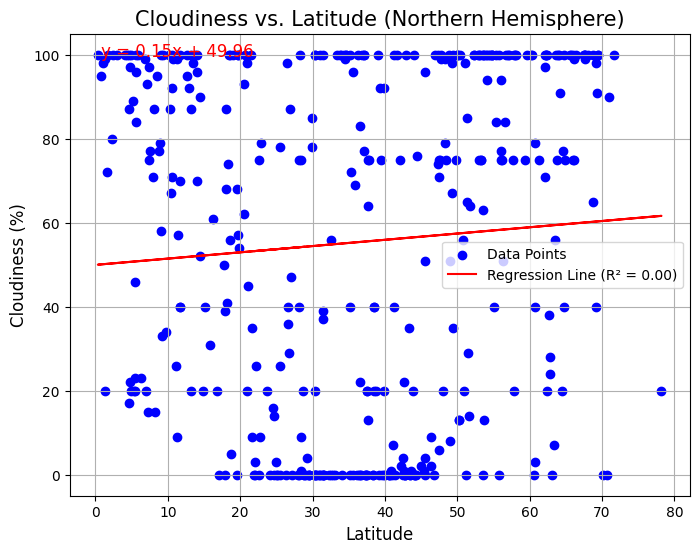

In [ ]:
# Northern Hemisphere
# Plot untuk Cloudiness vs Latitude
plot_linear_regression(northern_df["Lat"], northern_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                       "Cloudiness vs. Latitude", "Northern Hemisphere")



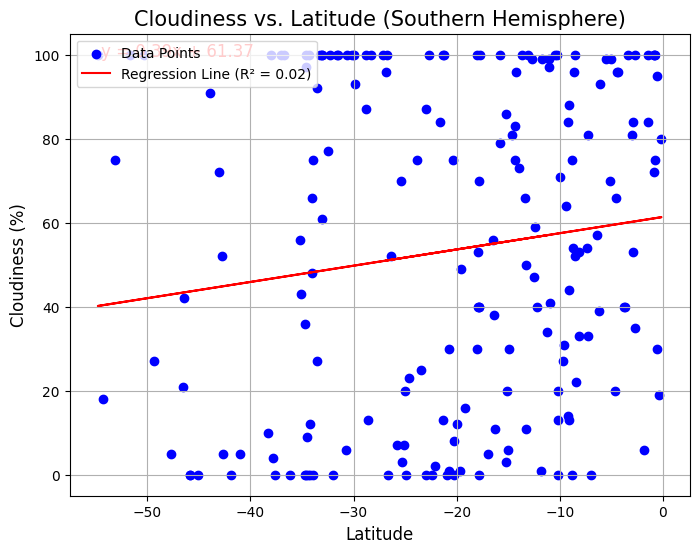

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_df["Lat"], southern_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                       "Cloudiness vs. Latitude", "Southern Hemisphere")

**Discussion about the linear relationship:**

**Cloudiness vs. Latitude:**


Belahan Bumi Utara:
Grafik menggambarkan hubungan antara cloudiness dan latitude di belahan bumi utara, dengan persamaan regresi  dan . tren positif sangat lemah dengan slope 0,15%, menunjukkan bahwa latitude yang lebih tinggi mungkin sedikit berhubungan dengan peningkatan cloudiness. Namun, nilai  menunjukkan bahwa hubungan ini hampir tidak ada, dan latitude tidak menjelaskan variasi yang signifikan dalam cloudiness. Data tersebar menunjukkan tidak adanya pola yang jelas antara latitude dan cloudiness.




Belahan Bumi Selatan:
Grafik menggambarkan hubungan antara cloudiness dan latitude di belahan bumi selatan, dengan persamaan regresi y = 0.02x + 61.37 dan tren positif sangat lemah dengan slope 0,02%, menunjukkan bahwa latitude yang lebih tinggi mungkin sedikit berhubungan dengan peningkatan cloudiness. Namun, nilai  menunjukkan bahwa hubungan ini hampir tidak ada, dan latitude tidak menjelaskan variasi yang signifikan dalam cloudiness. Data tersebar menunjukkan tidak adanya pola yang jelas antara latitude dan cloudiness.


### Wind Speed vs. Latitude Linear Regression Plot

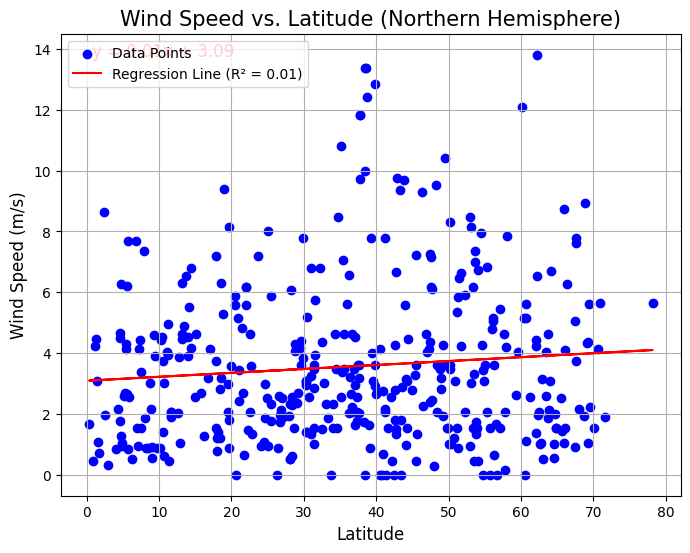

In [ ]:
# Northern Hemisphere
# Plot untuk Wind Speed vs Latitude
plot_linear_regression(northern_df["Lat"], northern_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "Wind Speed vs. Latitude", "Northern Hemisphere")

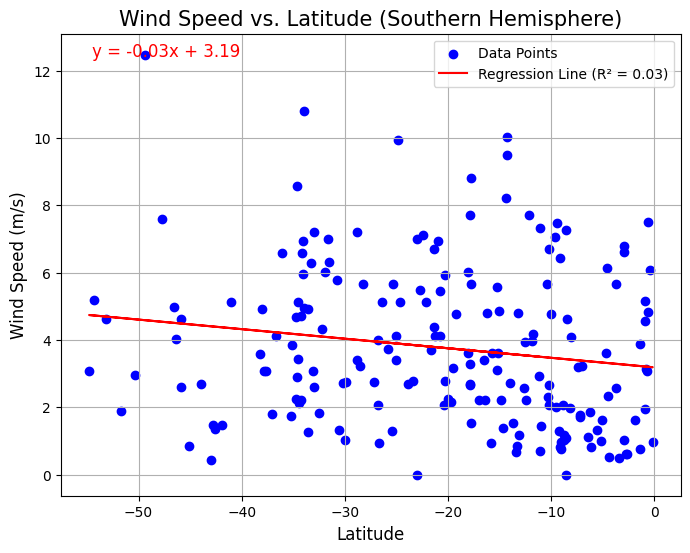

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_df["Lat"], southern_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                       "Wind Speed vs. Latitude", "Southern Hemisphere")

**Discussion about the linear relationship:**
**Wind Speed vs. Latitude:**

Belahan Bumi Utara:
Grafik menunjukkan hubungan antara kecepatan angin dan latitude di belahan bumi utara, dengan persamaan regresi  y= -0,01x + 3.09 dan . Ada tren positif yang lemah, di mana peningkatan latitude di belahan bumi utara berhubungan dengan sedikit penurunan kecepatan angin (sekitar 0,01 m/s per derajat latitude). Namun, nilai  menunjukkan bahwa latitude hanya menjelaskan sekitar 1% variasi dalam kecepatan angin. dan kecepatan angin berada pada nilai 0-4 m/s




Belahan Bumi Selatan:
Grafik menunjukkan hubungan antara kecepatan angin dan latitude di belahan bumi selatan, dengan persamaan regresi  y= -0,03x + 3.19 dan . Ada tren negatif yang lemah, di mana peningkatan latitude di belahan bumi selatan berhubungan dengan sedikit penurunan kecepatan angin (sekitar 0,03 m/s per derajat latitude). Namun, nilai  menunjukkan bahwa latitude hanya menjelaskan sekitar 3% variasi dalam kecepatan angin.
